In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.special import comb
from itertools import combinations, permutations
#from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Data collection and description

In [17]:
# Import Dataset
col_names = ['pur1','pur2','pur3','pur4','pur5','pur6','pur7','pur8','pur9','pur10','pur11','pur12','pur13','pur14','pur15','pur16','pur17','pur18','pur19','pur20','pur21','pur22','pur23','pur24','pur25','pur26','pur27','pur28','pur29','pur30','pur31','pur32']
df=pd.read_csv('C:/Users/Admin/Downloads/groceries.csv', names=col_names)
df

,pur1,pur2,pur3,pur4,pur5,pur6,pur7,pur8,pur9,pur10,...,pur23,pur24,pur25,pur26,pur27,pur28,pur29,pur30,pur31,pur32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.shape

(9835, 32)

In [19]:
records = []

In [20]:
for i in range(0, 9835):
    if i != None :
        records.append([str(df.values[i,j]) for j in range(0, 32)])

In [21]:
item_sets = {}
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)

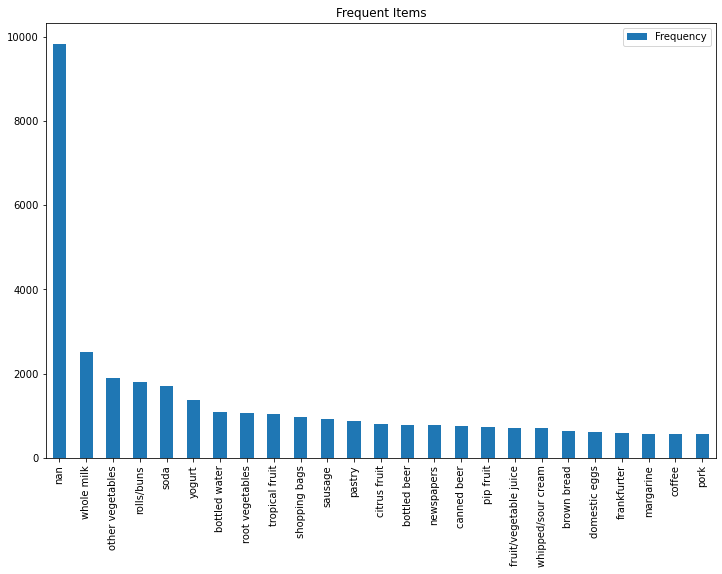

In [22]:
ap = pd.DataFrame(te_ary, columns=te.columns_)
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

# Apriori algorithm

In [23]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [24]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [25]:
confs = []
for i in [0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

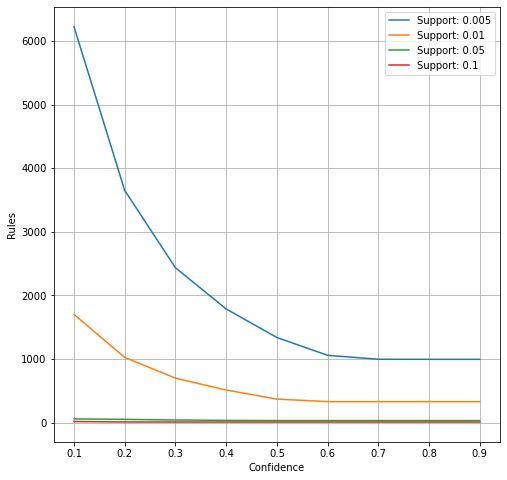

In [26]:
all_conf = pd.concat(confs,axis=1)
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

#    Conclusion

In [27]:
ap_final =  apriori(ap,0.01,True)
rules_final = association_rules(ap_final,min_threshold=.3,support_only=False)

In [28]:
rules_final[rules_final['confidence'] > 0.5]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(nan),0.033452,0.999898,0.033452,1.000000,1.000102,0.000003,inf
1,(baking powder),(nan),0.017692,0.999898,0.017692,1.000000,1.000102,0.000002,inf
2,(beef),(nan),0.052466,0.999898,0.052364,0.998062,0.998164,-0.000096,0.052466
6,(berries),(nan),0.033249,0.999898,0.033249,1.000000,1.000102,0.000003,inf
10,(beverages),(nan),0.026029,0.999898,0.025928,0.996094,0.996195,-0.000099,0.026029
...,...,...,...,...,...,...,...,...,...
690,"(tropical fruit, yogurt, nan)",(whole milk),0.029181,0.255516,0.015048,0.515679,2.018188,0.007592,1.537172
692,"(tropical fruit, yogurt)","(whole milk, nan)",0.029283,0.255414,0.015048,0.513889,2.011981,0.007569,1.531719
693,"(whole milk, yogurt, whipped/sour cream)",(nan),0.010880,0.999898,0.010778,0.990654,0.990755,-0.000101,0.010880
695,"(yogurt, whipped/sour cream, nan)",(whole milk),0.020641,0.255516,0.010778,0.522167,2.043580,0.005504,1.558044


In [29]:
support = rules_final["support"]
confidence =  rules_final["confidence"]
lift = rules_final["lift"]

Text(0.5, 0, 'lift')

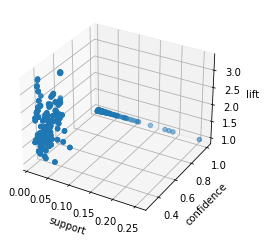

In [30]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

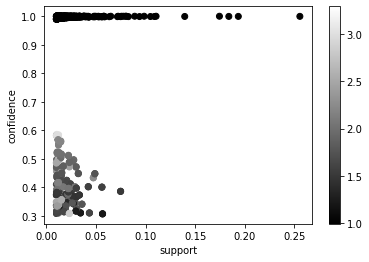

In [31]:
plt.scatter(support,confidence, c =lift, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")